In [4]:
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import roc_auc_score, log_loss, confusion_matrix, precision_recall_curve, auc, roc_curve, classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [5]:
def print_avg_and_mean(dict):
    # Ponderado
    weighted_avg_precision = dict['weighted avg']['precision']
    weighted_avg_recall = dict['weighted avg']['recall']
    weighted_avg_f1_score = dict['weighted avg']['f1-score']
    weighted_avg_support = dict['weighted avg']['support']

    # Aritmético
    mean_precision = np.mean([dict[label]["precision"] for label in dict.keys() if label != "accuracy"])
    mean_recall = np.mean([dict[label]["recall"] for label in dict.keys() if label != "accuracy"]
    )
    mean_f1_score = np.mean([dict[label]["f1-score"] for label in dict.keys() if label != "accuracy"])
    mean_support = np.mean([dict[label]["support"] for label in dict.keys() if label != "accuracy"])

    print(f'Média Ponderada - Precisão: {weighted_avg_precision}')
    print(f'Média Ponderada - Recall: {weighted_avg_recall}')
    print(f'Média Ponderada - F1-Score: {weighted_avg_f1_score}')
    print(f'Média Ponderada - Support: {weighted_avg_support}')
    print('--------------------------------------------------')
    print(f'Média Aritmética - Precisão: {mean_precision}')
    print(f'Média Aritmética - Recall: {mean_recall}')
    print(f'Média Aritmética - F1-Score: {mean_f1_score}')
    print(f'Média Aritmética - Support: {mean_support}')

In [6]:
# Definindo o valor das seeds para garantir reprodutibilidade

RANDOM_SEED = 42

os.environ['PYTHONHASHSEED']=str(RANDOM_SEED)

random.seed(RANDOM_SEED)

np.random.seed(RANDOM_SEED)

In [7]:
# Carregar os dados de treino e teste
mitbih_train = pd.read_csv('mitbih_test.csv', header=None)
mitbih_test = pd.read_csv('mitbih_train.csv', header=None)

# Separar os conjuntos de treino e teste 
x_train = mitbih_train.iloc[:, :-1].values
y_train = mitbih_train.iloc[:, -1].values

# Variáveis para teste e validação (50% teste - 50% validação)
X_test, X_val, y_test, y_val = train_test_split(
    mitbih_test.iloc[:, :-1].values, 
    mitbih_test.iloc[:, -1].values, 
    test_size=0.5, 
    random_state=RANDOM_SEED
)

In [9]:
# Treinamento do modelo
RandomForest = RandomForestClassifier(random_state=RANDOM_SEED)
RandomForest.fit(x_train, y_train)

# Previsão com base no conjunto de validação
y_val_pred = RandomForest.predict(X_val)
classification_report_val = classification_report(y_val, y_val_pred)

y_test_pred = RandomForest.predict(X_test)
classification_report_test = classification_report(y_test, y_test_pred)

print("Relatório de Classificação - Validação (RandomForest)")
print(classification_report(y_val, y_val_pred))

print("Relatório de Classificação - Teste (RandomForest)")
print(classification_report(y_test, y_test_pred))

cm_test = confusion_matrix(y_test, y_test_pred)
specificities_test = []
for i in range(len(cm_test)):
    TN = np.sum(cm_test) - np.sum(cm_test[i, :]) - np.sum(cm_test[:, i]) + cm_test[i, i]
    FP = np.sum(cm_test[:, i]) - cm_test[i, i]
    specificity = TN / (TN + FP) if (TN + FP) > 0 else 0
    specificities_test.append(specificity)

specificity_mean_test = np.mean(specificities_test)
print(f"Especificidade Média do RandomForest (Teste): {specificity_mean_test:.4f}")

cm_val = confusion_matrix(y_val, y_val_pred)
specificities_val = []
for i in range(len(cm_val)):
    TN = np.sum(cm_val) - np.sum(cm_val[i, :]) - np.sum(cm_val[:, i]) + cm_val[i, i]
    FP = np.sum(cm_val[:, i]) - cm_val[i, i]
    specificity = TN / (TN + FP) if (TN + FP) > 0 else 0
    specificities_val.append(specificity)

specificity_mean_val = np.mean(specificities_val)
print(f"Especificidade Média do RandomForest (Validação): {specificity_mean_val:.4f}")

Relatório de Classificação - Validação (RandomForest)
             precision    recall  f1-score   support

        0.0       0.96      1.00      0.98     36284
        1.0       0.96      0.54      0.69      1066
        2.0       0.95      0.82      0.88      2876
        3.0       0.83      0.40      0.54       324
        4.0       0.99      0.92      0.95      3227

avg / total       0.96      0.96      0.96     43777

Relatório de Classificação - Teste (RandomForest)
             precision    recall  f1-score   support

        0.0       0.96      1.00      0.98     36187
        1.0       0.95      0.56      0.70      1157
        2.0       0.96      0.82      0.89      2912
        3.0       0.84      0.37      0.51       317
        4.0       0.98      0.91      0.95      3204

avg / total       0.96      0.96      0.96     43777

Especificidade Média do RandomForest (Teste): 0.9616
Especificidade Média do RandomForest (Validação): 0.9635


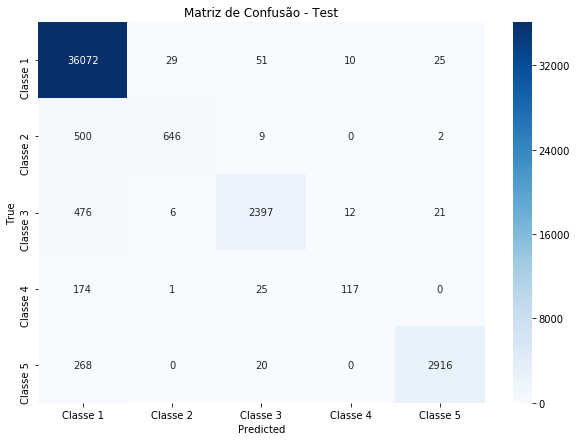

In [10]:
plt.figure(figsize=(10, 7))
sns.heatmap(cm_test, annot=True, fmt='g', cmap='Blues', xticklabels=['Classe 1', 'Classe 2', 'Classe 3', 'Classe 4', 'Classe 5'], yticklabels=['Classe 1', 'Classe 2', 'Classe 3', 'Classe 4', 'Classe 5'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title(f'Matriz de Confusão - Test')
plt.show()

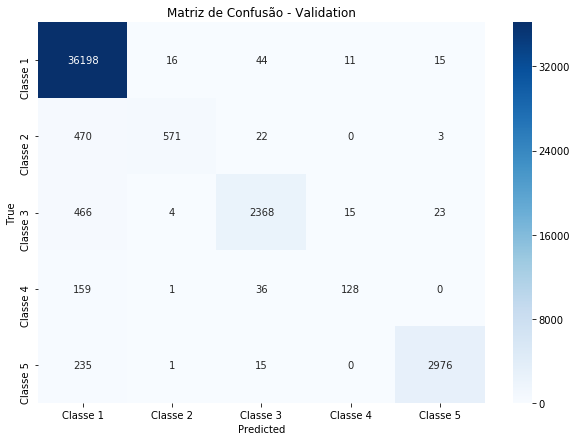

In [11]:
plt.figure(figsize=(10, 7))
sns.heatmap(cm_val, annot=True, fmt='g', cmap='Blues', xticklabels=['Classe 1', 'Classe 2', 'Classe 3', 'Classe 4', 'Classe 5'], yticklabels=['Classe 1', 'Classe 2', 'Classe 3', 'Classe 4', 'Classe 5'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title(f'Matriz de Confusão - Validation')
plt.show()

In [12]:
# Treinamento do modelo
RandomForest_Best = RandomForestClassifier(bootstrap = False, max_depth = 30, min_samples_leaf = 1, min_samples_split = 2,
                                      n_estimators = 84, random_state=RANDOM_SEED)
RandomForest_Best.fit(x_train, y_train)

# Previsão com base no conjunto de validação
y_val_pred = RandomForest_Best.predict(X_val)
classification_report_val = classification_report(y_val, y_val_pred)

y_test_pred = RandomForest_Best.predict(X_test)
classification_report_test = classification_report(y_test, y_test_pred)

print("Relatório de Classificação - Validação (RandomForest)")
print(classification_report(y_val, y_val_pred))

print("Relatório de Classificação - Teste (RandomForest)")
print(classification_report(y_test, y_test_pred))

cm_test = confusion_matrix(y_test, y_test_pred)
specificities_test = []
for i in range(len(cm_test)):
    TN = np.sum(cm_test) - np.sum(cm_test[i, :]) - np.sum(cm_test[:, i]) + cm_test[i, i]
    FP = np.sum(cm_test[:, i]) - cm_test[i, i]
    specificity = TN / (TN + FP) if (TN + FP) > 0 else 0
    specificities_test.append(specificity)

specificity_mean_test = np.mean(specificities_test)
print(f"Especificidade Média do RandomForest (Teste): {specificity_mean_test:.4f}")

cm_val = confusion_matrix(y_val, y_val_pred)
specificities_val = []
for i in range(len(cm_val)):
    TN = np.sum(cm_val) - np.sum(cm_val[i, :]) - np.sum(cm_val[:, i]) + cm_val[i, i]
    FP = np.sum(cm_val[:, i]) - cm_val[i, i]
    specificity = TN / (TN + FP) if (TN + FP) > 0 else 0
    specificities_val.append(specificity)

specificity_mean_val = np.mean(specificities_val)
print(f"Especificidade Média do RandomForest (Validação): {specificity_mean_val:.4f}")

Relatório de Classificação - Validação (RandomForest)
             precision    recall  f1-score   support

        0.0       0.97      1.00      0.98     36284
        1.0       0.97      0.58      0.73      1066
        2.0       0.96      0.86      0.91      2876
        3.0       0.93      0.50      0.65       324
        4.0       0.99      0.94      0.97      3227

avg / total       0.97      0.97      0.97     43777

Relatório de Classificação - Teste (RandomForest)
             precision    recall  f1-score   support

        0.0       0.97      1.00      0.98     36187
        1.0       0.97      0.61      0.75      1157
        2.0       0.96      0.86      0.91      2912
        3.0       0.90      0.48      0.62       317
        4.0       0.99      0.93      0.96      3204

avg / total       0.97      0.97      0.97     43777

Especificidade Média do RandomForest (Teste): 0.9686
Especificidade Média do RandomForest (Validação): 0.9693


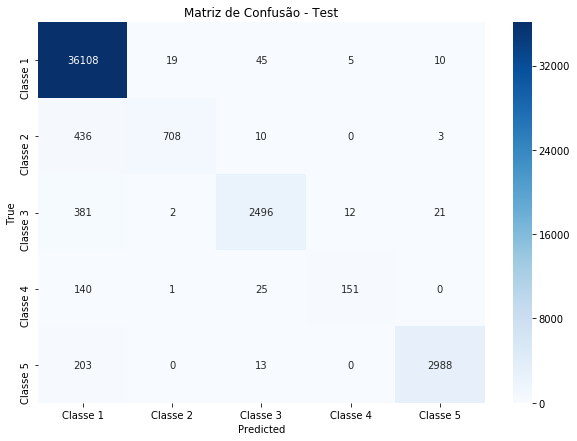

In [13]:
plt.figure(figsize=(10, 7))
sns.heatmap(cm_test, annot=True, fmt='g', cmap='Blues', xticklabels=['Classe 1', 'Classe 2', 'Classe 3', 'Classe 4', 'Classe 5'], yticklabels=['Classe 1', 'Classe 2', 'Classe 3', 'Classe 4', 'Classe 5'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title(f'Matriz de Confusão - Test')
plt.show()

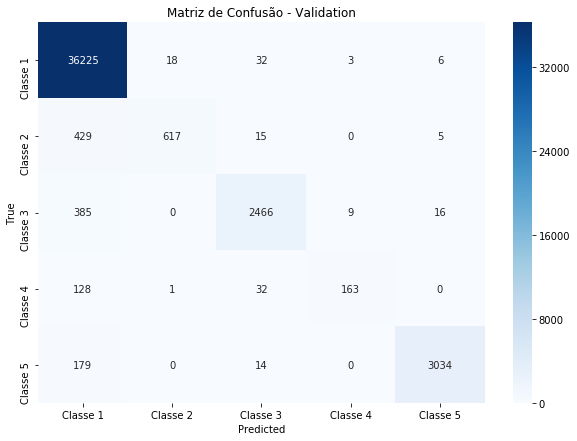

In [14]:
plt.figure(figsize=(10, 7))
sns.heatmap(cm_val, annot=True, fmt='g', cmap='Blues', xticklabels=['Classe 1', 'Classe 2', 'Classe 3', 'Classe 4', 'Classe 5'], yticklabels=['Classe 1', 'Classe 2', 'Classe 3', 'Classe 4', 'Classe 5'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title(f'Matriz de Confusão - Validation')
plt.show()